In [63]:
!pip install neuralprophet --quiet
!pip install prophet --quiet

In [64]:
import pandas as pd
#from neuralprophet import NeuralProphet
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [30]:
df = pd.read_csv(
    'austin_weather.csv'
    , parse_dates=['Date']
);

df.head(1)

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"


In [31]:
cols = [
    c.strip().lower().replace(' ','_')
    for c in df.columns
]

df.columns = cols; df.head(1)

,date,temphighf,tempavgf,templowf,dewpointhighf,dewpointavgf,dewpointlowf,humidityhighpercent,humidityavgpercent,humiditylowpercent,...,sealevelpressureavginches,sealevelpressurelowinches,visibilityhighmiles,visibilityavgmiles,visibilitylowmiles,windhighmph,windavgmph,windgustmph,precipitationsuminches,events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date                        1319 non-null   datetime64[ns]
 1   temphighf                   1319 non-null   int64         
 2   tempavgf                    1319 non-null   int64         
 3   templowf                    1319 non-null   int64         
 4   dewpointhighf               1319 non-null   object        
 5   dewpointavgf                1319 non-null   object        
 6   dewpointlowf                1319 non-null   object        
 7   humidityhighpercent         1319 non-null   object        
 8   humidityavgpercent          1319 non-null   object        
 9   humiditylowpercent          1319 non-null   object        
 10  sealevelpressurehighinches  1319 non-null   object        
 11  sealevelpressureavginches   1319 non-null   object      

In [40]:
print(f'start: {df.date.min()}, end: {df.date.max()}')

start: 2013-12-21 00:00:00, end: 2017-07-31 00:00:00


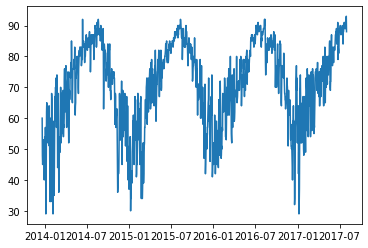

In [36]:
plt.plot(df.date, df.tempavgf)
plt.show()

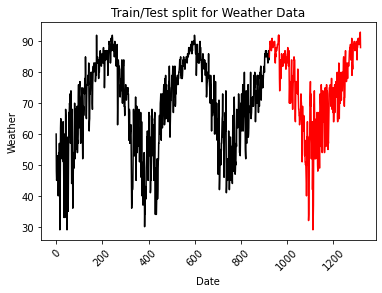

In [47]:
train = df.loc[df.date < pd.to_datetime('2016-07-01')]
test = df.loc[df.date >= pd.to_datetime('2016-07-01')]

plt.plot(train.tempavgf, color = "black")
plt.plot(test.tempavgf, color = "red")
plt.ylabel('Weather')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Weather Data")
plt.show()

In [65]:
m = Prophet()

In [81]:
train_data = train[['date','tempavgf']]; train_data.head(1)

,date,tempavgf
0,2013-12-21,60


In [82]:
train_data = train_data.rename(columns={'date':'ds','tempavgf':'y'}); train_data.head()

,ds,y
0,2013-12-21,60
1,2013-12-22,48
2,2013-12-23,45
3,2013-12-24,46
4,2013-12-25,50


In [86]:
train_data.tail()

,ds,y
918,2016-06-26,86
919,2016-06-27,86
920,2016-06-28,87
921,2016-06-29,84
922,2016-06-30,85


In [83]:
m.fit(train_data)

22:29:33 - cmdstanpy - INFO - Chain [1] start processing
22:29:34 - cmdstanpy - INFO - Chain [1] done processing


In [85]:
future = m.make_future_dataframe(periods=7); future.tail()

,ds
925,2016-07-03
926,2016-07-04
927,2016-07-05
928,2016-07-06
929,2016-07-07


In [87]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
925,2016-07-03,85.934694,77.897852,94.665942
926,2016-07-04,85.854112,77.496607,94.289888
927,2016-07-05,85.907342,77.741118,93.891516
928,2016-07-06,86.280340,77.896449,95.545501
929,2016-07-07,86.734583,78.647063,95.132549


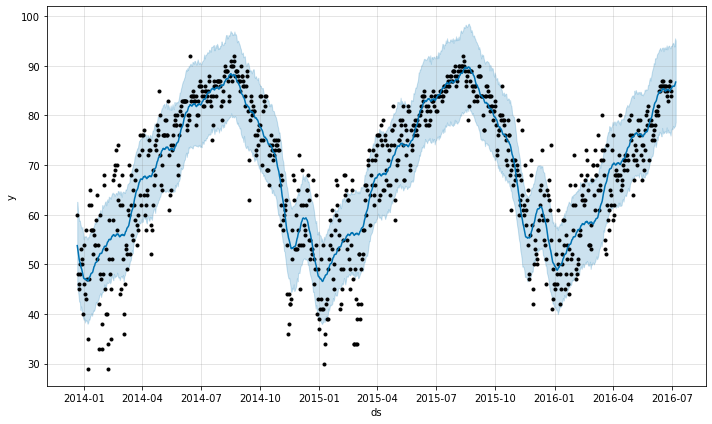

In [90]:
fig1 = m.plot(forecast)

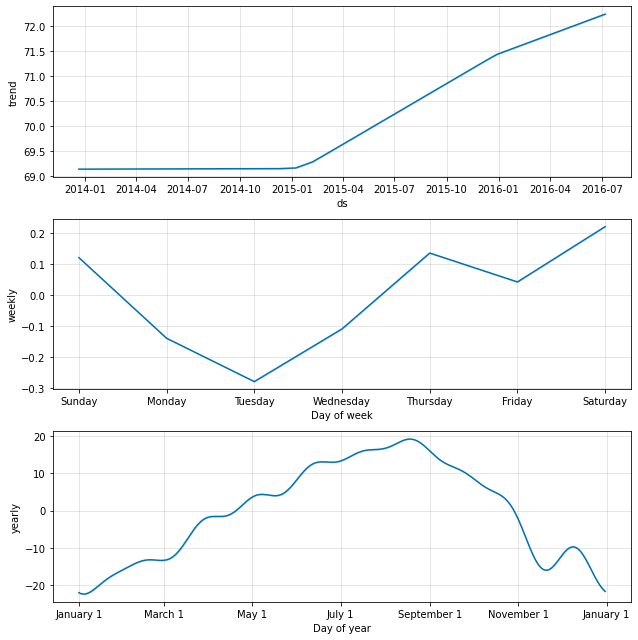

In [91]:
fig2 = m.plot_components(forecast)